In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data: pd.DataFrame = pd.read_csv("population.csv")
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
countries = pd.concat([
    data.loc[data["Country Name"] == "Indonesia"], 
    data.loc[data["Country Name"] == "United States"]
])

countries.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

countries = countries.T 

countries


,106,251
1960,87751066.0,180671000.0
1961,90098396.0,183691000.0
1962,92518373.0,186538000.0
1963,95015295.0,189242000.0
1964,97596728.0,191889000.0
...,...,...
2016,261556386.0,323071755.0
2017,264650969.0,325122128.0
2018,267670549.0,326838199.0
2019,270625567.0,328329953.0


In [4]:
countries.dropna(inplace=True)

countries = countries.reset_index().rename(columns={106:"Indonesia_Population", 251:"USA_Population", "index":"Year"})
countries

,Year,Indonesia_Population,USA_Population
0,1960,87751066.0,180671000.0
1,1961,90098396.0,183691000.0
2,1962,92518373.0,186538000.0
3,1963,95015295.0,189242000.0
4,1964,97596728.0,191889000.0
...,...,...,...
56,2016,261556386.0,323071755.0
57,2017,264650969.0,325122128.0
58,2018,267670549.0,326838199.0
59,2019,270625567.0,328329953.0


<Axes: xlabel='Year', ylabel='Indonesia_Population'>

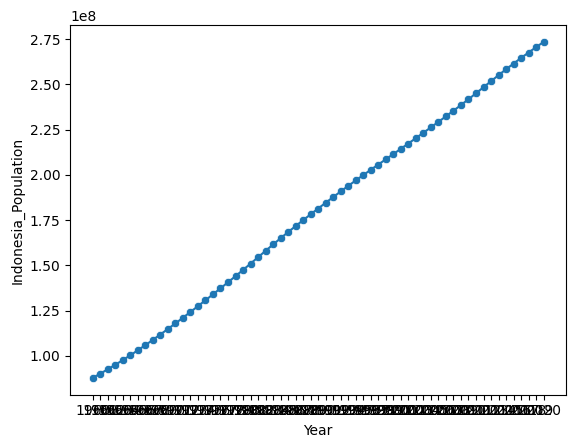

In [5]:
sns.lineplot(x="Year", y="Indonesia_Population", data=countries)
sns.scatterplot(x="Year", y="Indonesia_Population", data=countries)

<Axes: xlabel='Year', ylabel='USA_Population'>

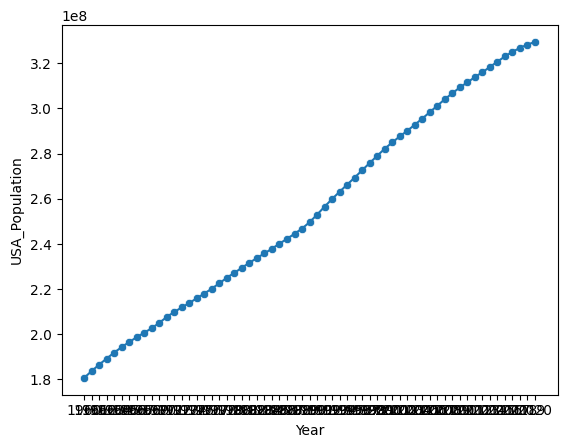

In [6]:
sns.lineplot(x="Year", y="USA_Population", data=countries)
sns.scatterplot(x="Year", y="USA_Population", data=countries)

In [7]:
countries["Indonesia_Population"] = pd.to_numeric(countries["Indonesia_Population"])
countries["Year"] = pd.to_numeric(countries["Year"])
x_id = countries["Year"]
y_id = countries["Indonesia_Population"]

countries["USA_Population"] = pd.to_numeric(countries["USA_Population"])
countries["Year"] = pd.to_numeric(countries["Year"])
x_us = countries["Year"]
y_us = countries["USA_Population"]

In [8]:
x_train_id, x_test_id, y_train_id, y_test_id = train_test_split(x_id, y_id, test_size=0.2)
x_train_id = x_train_id.values.reshape(-1, 1)
y_train_id = y_train_id.values.reshape(-1, 1)
x_test_id = x_test_id.values.reshape(-1, 1)
y_test_id = y_test_id.values.reshape(-1, 1)

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x_us, y_us, test_size=0.2)
x_train_us = x_train_us.values.reshape(-1, 1)
y_train_us = y_train_us.values.reshape(-1, 1)
x_test_us = x_test_us.values.reshape(-1, 1)
y_test_us = y_test_us.values.reshape(-1, 1)

In [9]:
model_id = LinearRegression()
model_us = LinearRegression()

model_id = model_id.fit(x_train_id, y_train_id)
y_predict_id = model_id.predict(x_test_id)

model_us = model_us.fit(x_train_us, y_train_us)
y_predict_us = model_us.predict(x_test_us)

<Axes: title={'center': 'Indonesia: Data vs Predicted'}, xlabel='Year', ylabel='Indonesia_Population'>

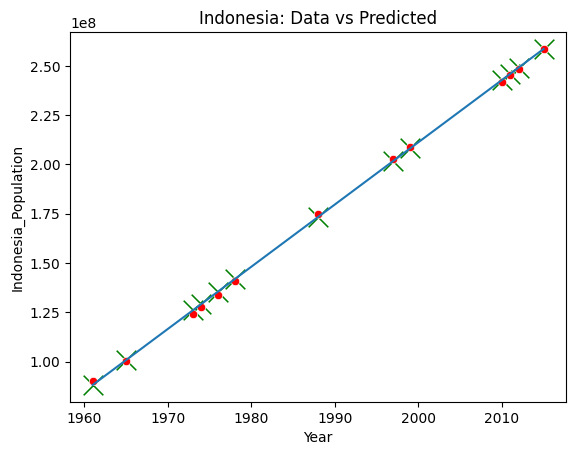

In [10]:
plt.xlabel("Year")
plt.ylabel("Indonesia_Population")
plt.title("Indonesia: Data vs Predicted")
sns.lineplot(x=x_test_id.reshape(-1), y=y_predict_id.reshape(-1))
sns.scatterplot(x=x_test_id.reshape(-1), y=y_predict_id.reshape(-1), marker="x", color="green", s=200)
sns.scatterplot(x=x_test_id.reshape(-1), y=y_test_id.reshape(-1), color="red")

<Axes: xlabel='Year', ylabel='USA_Population'>

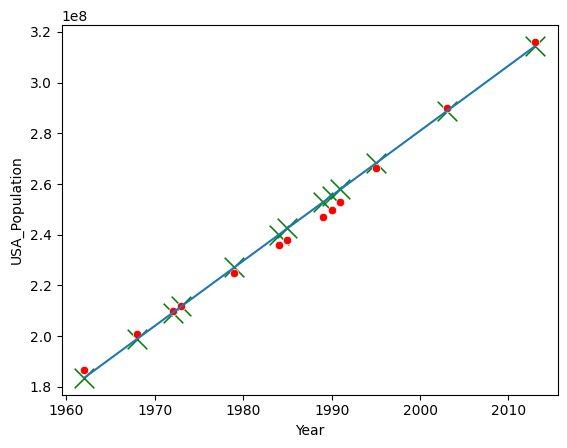

In [11]:
plt.xlabel("Year")
plt.ylabel("USA_Population")
plt.ylabel("USA_Population")
sns.lineplot(x=x_test_us.reshape(-1), y=y_predict_us.reshape(-1))
sns.scatterplot(x=x_test_us.reshape(-1), y=y_predict_us.reshape(-1), marker="x", color="green", s=200)
sns.scatterplot(x=x_test_us.reshape(-1), y=y_test_us.reshape(-1), color="red")

In [13]:
year_input: int = int(input("Enter a year: "))

predict_input_id = model_id.predict([[year_input]])
predict_input_us = model_us.predict([[year_input]])
print(f"Indonesia's and USA's population on {year_input} is \nIndonesia:{int(predict_input_id)}\nUSA:{int(predict_input_us)}")

Indonesia's and USA's population on 2070 is 
Indonesia:432112868
USA:460585624


/tmp/ipykernel_89520/1559436654.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Indonesia's and USA's population on {year_input} is \nIndonesia:{int(predict_input_id)}\nUSA:{int(predict_input_us)}")


In [14]:
year: int = 2021
years: list[int] = []
populations_id: list[int] = []
populations_us: list[int] = []

for i in range(year_input):
    years.append(year + i)
    populations_id.append(model_id.predict([[year + i]])[0][0])
    populations_us.append(model_us.predict([[year + i]])[0][0])
    
data_prediction = pd.DataFrame({
    "Year" : years,
    "ID_Population": populations_id,
    "US_Population": populations_us
})

data_prediction

,Year,ID_Population,US_Population
0,2021,2.774885e+08,3.348906e+08
1,2022,2.806441e+08,3.374558e+08
2,2023,2.837997e+08,3.400210e+08
3,2024,2.869553e+08,3.425862e+08
4,2025,2.901109e+08,3.451515e+08
...,...,...,...
2065,4086,6.793802e+09,5.632036e+09
2066,4087,6.796957e+09,5.634602e+09
2067,4088,6.800113e+09,5.637167e+09
2068,4089,6.803269e+09,5.639732e+09
